## Overview of Sckit-Learn library

![Scikit Learn Logo](images/scikit_learn1.PNG)

## What is Machine Learning

Fundamentally, Machine Learning involves building mathematical models to help understand data. Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.

Machine learning can be categorized into two main types: supervised learning and unsupervised learning.

- Supervised learning involves somehow modelling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into classification tasks and regression tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities
- Unsupervised learning involves modelling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself." These models include tasks such as clustering and dimensionality reduction. Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data. [1]

## Machine learning using the scikit-learn library

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities. [https://scikit-learn.org/stable/getting_started.html]

Simple and efficient tools for predictive data analysis
Accessible to everybody, and reusable in various contexts
Built on NumPy, SciPy, and matplotlib
Open source, commercially usable - BSD license

Rather than focusing on loading, manipulating and summarising data, Scikit-learn library is focused on modeling the data.

Learning Problems tend to fall into two categories  - Supervised and Unsupervised 
In supervised learning you have a few example inputs and outputs 
In unser - you dont have a labled set
In teh background the algorithms can be nearly idential 

From data camp [] add link,
Scikit-learn is an open source Python library that implements a range of machine learning, preprocessing, cross-validation and visualization algorithms using a unified interface.

To be completed after further research and lectures

#### Import required libraries

In [1]:
#import libraries as required 
import numpy as np

#import skitlearn library for ML 
import sklearn as sk
import sklearn.model_selection as mod
from sklearn.model_selection import train_test_split #for comparison to model

#import pandas for data frames
import pandas as pd

#import matplotlib and seaborn for plotting 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets as datasets #have to import in the indivdual libraries for datasets

#sckit - learn alogorithms - some demos!

The 3 i have selected from my research that i find the most interesting - to be confirmed

Classification

Random Forrest
Gradient boosting
Decision tree
SVM
covered in lectures

KNN
Logistic regression
Regression

## Classification Alogorithims versus Regression Algorithms 

Classification refers to the task of giving a machine learning algorithm features, and having the algorithm put the instances/data points into one of many discrete classes. Classes are categorical in nature, it isn't possible for an instance to be classified as partially one class and partially another. A classic example of a classification task is classifying emails as either "spam" or "not spam" - there's no "a bit spammy" email.

There is an important difference between classification and regression problems.-  Fundamentally, classification is about predicting a label and regression is about predicting a quantity.
https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/

Regressions are done when the output of the machine learning model is a real value or a continuous value. Such an example of these continuous values would be "weight" or "length". An example of a regression task is predicting the age of a person based off of features like height, weight, income, etc.

Processing and testing my dataset

- Note - consider using Iris dataset as could be ideal for classification analysis - add more detail on Iris dataset

In [3]:
#import the dataset pre built into sckit learn if required 
#from sklearn.datasets import load_iris
#import sklearn.model_selection as mod
#import pandas as pd
#data = load_iris()

OR IMPORT THE ONE I HAVE DOWNLOADED 

In [4]:
# Import the iris.csv dataset and name as df
df = pd.read_csv("datasets/iris/iris.csv") #using pandas read_csv function
#after research define species as type category thanks to https://github.com/simonava5/fishers-iris-data
df['species'] = df['species'].astype('category') #category to be used for summary file

In [5]:
#review the dataset
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
#statistics summary 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


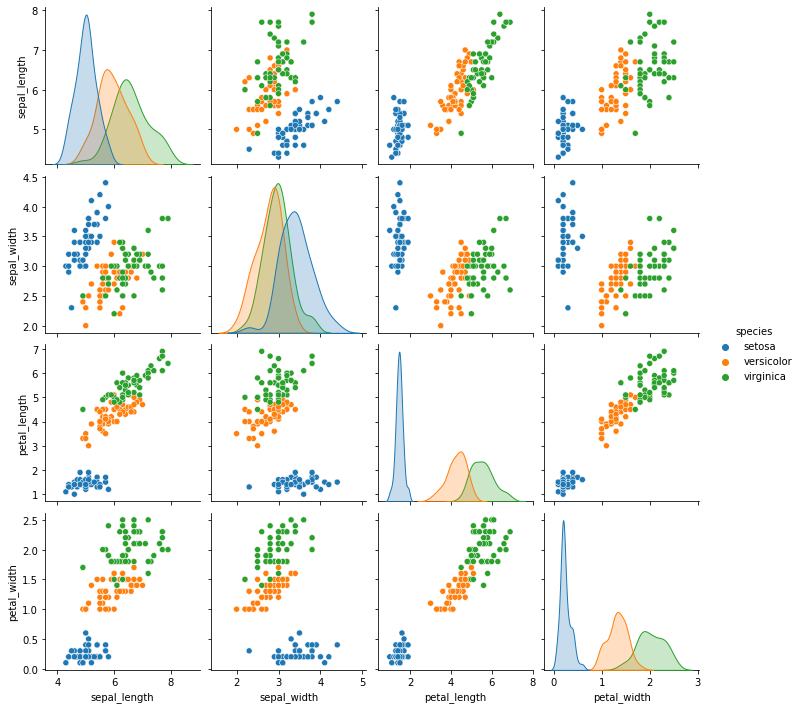

In [7]:
#### Visualise dataset - research into more interesting plots etc than just used in lecutures
sns.pairplot(df, hue='species');

## Training and Testing our data for further analysis
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Too check the accuracy of our model, we split the dataset into two pieces-a training 
set and a testing set. I wil use training set to train the model and testing set to test the 
model. After that, we can will use our selected algoritms to check we well our did.

The following example will split the data into 60:40 ratio,  40% data will be used as 
training data and 40% will be used as testing data

In [8]:
#Split our data in trainng and testing models
train, test = mod.train_test_split(df,test_size=.40,random_state=1)
#or
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=1)

In [9]:
#display training data
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
11,4.8,3.4,1.6,0.2,setosa
113,5.7,2.5,5.0,2.0,virginica
123,6.3,2.7,4.9,1.8,virginica
12,4.8,3.0,1.4,0.1,setosa
2,4.7,3.2,1.3,0.2,setosa


In [10]:
#display test data
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica


In [11]:
#check the size of our testing model
test.index.size

60

In [53]:
#selecting our inputs and outputs 
inputs, outputs = train[['sepal_length','sepal_width','petal_length','petal_width']], train['species']

In [54]:
#look at our inputs
inputs.head()

,sepal_length,sepal_width,petal_length,petal_width
11,4.8,3.4,1.6,0.2
113,5.7,2.5,5.0,2.0
123,6.3,2.7,4.9,1.8
12,4.8,3.0,1.4,0.1
2,4.7,3.2,1.3,0.2


In [55]:
outputs.head()

11        setosa
113    virginica
123    virginica
12        setosa
2         setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

__________________

## Decison Tree Alogorithm

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/tree.html#tree

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret. https://www.datacamp.com/community/tutorials/decision-tree-classification-python

### Classification analysis and predictions on Iris Data set using Decision tree Algorithm

Very interesting descitpion of clasification alogorithms from Data Camp - https://www.datacamp.com/community/tutorials/decision-tree-classification-python
As a marketing manager, you want a set of customers who are most likely to purchase your product. This is how you can save your marketing budget by finding your audience. As a loan manager, you need to identify risky loan applications to achieve a lower loan default rate. This process of classifying customers into a group of potential and non-potential customers or safe or risky loan applications is known as a classification problem. Classification is a two-step process, learning step and prediction step. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response for given data. Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression kind of problem

In [13]:
#import required library and classifier 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [14]:
#create new classifier as dtc
dtc = DecisionTreeClassifier (random_state=1)

In [15]:
#fit
dtc.fit(inputs,outputs)

DecisionTreeClassifier(random_state=1)

In [16]:
#using new classifer decision tree algorithm classifty the test data
predictions = dtc.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])
#display on screen
predictions

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor'], dtype=object)

In [49]:
#check how many were right predictions and how many were wrong
(predictions == test['species']).value_counts()

True     58
False     2
Name: species, dtype: int64

In [50]:
#use .score to see how many of the predictions are correct
dtc.score(test[['sepal_length','sepal_width','petal_length','petal_width']],test['species'])

0.9666666666666667

In [51]:
### thanks to [] dont forget to add link here and the reference (NOTE TO SELF)

from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(test['species'],predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.95      0.95      0.95        21
   virginica       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [52]:
(predictions == test['species']).value_counts(normalize=True)

True     0.966667
False    0.033333
Name: species, dtype: float64

In [20]:
print("Accuracy:",metrics.accuracy_score(test['species'],predictions))

Accuracy: 0.9666666666666667


No handles with labels found to put in legend.


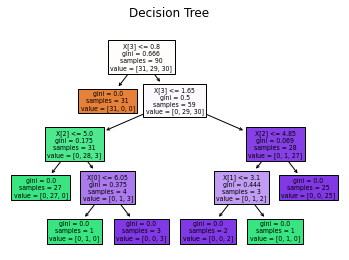

In [21]:
## need to read up more on this section to understand 

#plot results https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html

plt.figure()
plt.rcParams["figure.figsize"] = (150,50)
plt.suptitle("Decision Tree")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
#plt.axis("tight")

plot_tree(dtc, filled=True)
plt.show()

___________

## Classifcation analysis and predictions on Iris Data set using Random Forest Algorithm

Random forest is a supervised learning algorithm which is used for both classification as well as regression. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_classification_algorithms_random_forest.htm

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [22]:
#import required libraries
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)

In [23]:
#Split our data in traing and testing models
#train, test = mod.train_test_split(df)
train, test = mod.train_test_split(df,test_size=.40,random_state=1)
#selecting our inputs and outputs 
inputs, outputs = train[['sepal_length','sepal_width','petal_length','petal_width']], train['species']
#fit to our model
rfc.fit(inputs,outputs)

RandomForestClassifier(random_state=1)

In [24]:
predictions_rfc = rfc.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])
predictions_rfc

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor'], dtype=object)

In [25]:
(predictions_rfc == test['species']).value_counts()

True     58
False     2
Name: species, dtype: int64

In [26]:
#use .score to see how many of the predictions are correct
rfc.score(test[['sepal_length','sepal_width','petal_length','petal_width']],test['species'])

0.9666666666666667

In [27]:
### thanks to [] dont forget to add link here and the reference (NOTE TO SELF)
from sklearn.metrics import classification_report
print(classification_report(test['species'],predictions_rfc))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.95      0.95      0.95        21
   virginica       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



_________________

## Gradient Boosting Classifier 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Scikit-Learn, supports different implementations of gradient boosting classifiers.

In order to implement a gradient boosting classifier, we'll need to carry out a number of different steps. We'll need to:

- Fit the model
- Tune the model's parameters and Hyperparameters
- Make predictions
- Interpret the result

In [28]:
#import from sklearn library 
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate = .001,random_state = 0)

#selecting our inputs and outputs 
inputs, outputs = train[['sepal_length','sepal_width','petal_length','petal_width']], train['species']

#fit the model
gbc.fit(inputs,outputs)

GradientBoostingClassifier(learning_rate=0.001, random_state=0)

In [29]:
#make predictions 
predictions_gbc = gbc.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])
predictions_gbc

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor'], dtype=object)

In [30]:
(predictions_gbc == test['species']).value_counts()
#In order to implement a gradient boosting classifier, we'll need to carry out a number of different steps. We'll need to:
#Interpret the result
#use .score to see how many of the predictions are correct
gbc.score(test[['sepal_length','sepal_width','petal_length','petal_width']],test['species'])

0.9333333333333333

In [31]:
## thanks to [] dont forget to add link here and the reference (NOTE TO SELF)
from sklearn.metrics import classification_report
print(classification_report(test['species'],predictions_gbc))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.95      0.86      0.90        21
   virginica       0.86      0.95      0.90        20

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60



https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

_______________________

### Logistic Regression (if required tho was used in lectures already) is actually used for classification!

##### Type: Classification

##### About

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function. [Reference from skitlearn online user guide]

Add more detail and research 

___________________________________________

## Multiple Linear Regression using Iris Data Set

In [32]:
#import linear model from sklearn
import sklearn.linear_model as lm

In [33]:
#create linear regreession model
lrm = lm.LinearRegression()

In [34]:
#we want to use the folowing 3 varibales to predict speal length - multiple input variables
x = df[['petal_length','petal_width','sepal_width']]

In [35]:
#sepal length - what we want to predict
y = df['sepal_length']

In [36]:
#use model to fit data
lrm.fit(x,y)

LinearRegression()

In [37]:
#find our intercept
lrm.intercept_

1.845060803216608

In [38]:
#find our coefcients 
lrm.coef_

array([ 0.71106291, -0.56256786,  0.65486424])

In [39]:
#testing our fit
lrm.score(x,y)

0.8592166649106592

### Training Our Model

In [40]:
#setup up our training and testing models
from sklearn.model_selection import train_test_split
#here i am going to specify the test size so the split will be 80/20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [41]:
#fit our training data only to model
lrm.fit(x_train, y_train)

LinearRegression()

In [42]:
#display the coefficients 
coeff_df = pd.DataFrame(lrm.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
petal_length,0.723974
petal_width,-0.582945
sepal_width,0.669463


### Making some predictions

In [43]:
y_pred = lrm.predict(x_test)
#how well did the model score
lrm.score(x_test,y_test)
#y_pred

0.7914533869230445

In [44]:
#display predictions on screen using a pandas dataframe
df = pd.DataFrame({'Actual Sepal Length': y_test, 'Predicted Sepal Length': y_pred.round(2)})
df

,Actual Sepal Length,Predicted Sepal Length
114,5.8,5.96
62,6.0,5.58
33,5.5,5.50
107,7.3,7.24
7,5.0,5.04
100,6.3,6.89
40,5.0,4.90
86,6.7,6.40
76,6.8,6.33
71,6.1,5.80


## Decision Tree Regression on Iris Data Set for comparison (may not use)

In [45]:
dtg = tree.DecisionTreeRegressor()

In [46]:
dtg.fit(x_train,y_train)

DecisionTreeRegressor()

In [47]:
#correct predictions?
dtg.score(x_test,y_test)

0.6061254806011883

In [48]:
dtg.predictions = dtg.predict(x_test)
dtg.predictions
df_dtg = pd.DataFrame({'Actual Sepal Length': y_test,'Predicted Sepal Length LRM':y_pred.round(2), 'Predicted Sepal Length DTG': dtg.predictions})
df_dtg

,Actual Sepal Length,Predicted Sepal Length LRM,Predicted Sepal Length DTG
114,5.8,5.96,5.8
62,6.0,5.58,5.5
33,5.5,5.50,5.7
107,7.3,7.24,7.4
7,5.0,5.04,5.1
100,6.3,6.89,6.8
40,5.0,4.90,5.5
86,6.7,6.40,7.0
76,6.8,6.33,6.1
71,6.1,5.80,5.8


## Conclusion

Overall Conclusion to be added , findings etc

## References and research etc

https://realpython.com/linear-regression-in-python/

https://scikit-learn.org/stable/user_guide.html


https://www.aboutdatablog.com/post/a-quick-overview-of-5-scikit-learn-classification-algorithms

https://www.tutorialspoint.com/scikit_learn/scikit_learn_quick_guide.htm

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

## The End